In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
pd.set_option('display.max_columns', None)

notebook_dir = os.getcwd()
os.chdir(notebook_dir);
print(notebook_dir)

C:\Users\HP\Python\Jupyter Notebook\Universidad\Tesis


In [47]:
df = pd.read_excel("./Input/PATIENTS.xls")
df = df[["Nº I.C.", "FECHA RECEPCION", "NOMBRE DEL PACIENTE", "EDAD (AÑOS)", "COMUNA",
        "T.E. FECHA RECEPCION", "ESPECIALIDAD", "TIPO_IQ"]];
df.rename(columns={"Nº I.C.": "id", "FECHA RECEPCION": "fecha", "NOMBRE DEL PACIENTE": "nombre", "EDAD (AÑOS)": "edad",
                  "COMUNA": "comuna", "T.E. FECHA RECEPCION": "espera", "ESPECIALIDAD": "especialidad", "TIPO_IQ": "tipo"}, inplace=True);

# Calcular columna "prioridad"
df["prioridad"] = (1 + df["fecha"] * df["edad"] * 0.0001).astype(int);

# Ordenar DataFrame por columna "prioridad" de menor a mayor
df = df.sort_values(by="prioridad");

df.head(160).to_csv("./Input/LowPriority.csv", index=False);

df.tail(160).to_csv("./Input/HighPriority.csv", index=False);

df_sample = df.sample(160, random_state=42);
df_sample.to_csv("./Input/AllPriority.csv", index=False);

print("Files created!");

Files created!


Estadísticas descriptivas para LowPriority.csv:
                  id        fecha        edad      espera        tipo  \
count     160.000000   160.000000  160.000000  160.000000  160.000000   
mean   247939.106250  1696.543750    4.843750  259.062500    1.268750   
std     21718.972061   382.870946    3.827321  220.809707    0.568811   
min    195755.000000   812.000000    0.000000    8.000000    1.000000   
25%    234748.750000  1526.500000    2.000000   71.000000    1.000000   
50%    253305.000000  1840.500000    4.000000  205.000000    1.000000   
75%    266388.500000  1999.500000    7.000000  379.250000    1.000000   
max    274165.000000  2045.000000   15.000000  849.000000    3.000000   

        prioridad  
count  160.000000  
mean     1.275000  
std      0.690911  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      1.000000  
max      3.000000  

Estadísticas descriptivas para HighPriority.csv:
                  id        fecha        edad      espera       

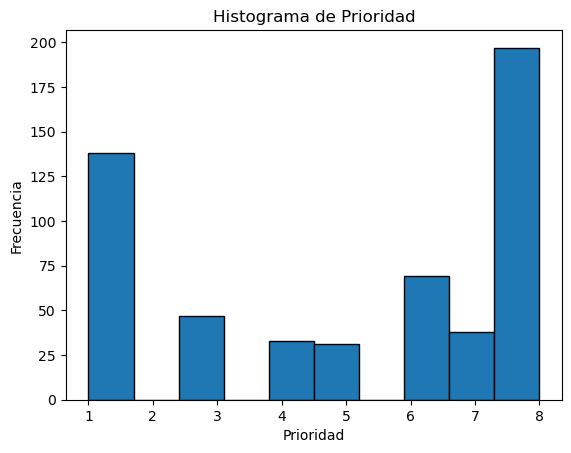

In [49]:
# Estadísticas descriptivas para los tres archivos
# Cargar los archivos nuevamente para generar estadísticas descriptivas
low_priority_df = pd.read_csv("./Input/LowPriority.csv");
high_priority_df = pd.read_csv("./Input/HighPriority.csv");
all_priority_df = pd.read_csv("./Input/AllPriority.csv");

# Generar estadísticas descriptivas
low_priority_stats = low_priority_df.describe();
high_priority_stats = high_priority_df.describe();
all_priority_stats = all_priority_df.describe();

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas para LowPriority.csv:");
print(low_priority_stats);
print("\nEstadísticas descriptivas para HighPriority.csv:");
print(high_priority_stats);
print("\nEstadísticas descriptivas para AllPriority.csv:");
print(all_priority_stats);

# Crear un histograma de la columna "prioridad"
plt.hist(df["prioridad"], bins=10, edgecolor="black");
plt.xlabel("Prioridad");
plt.ylabel("Frecuencia");
plt.title("Histograma de Prioridad");
plt.savefig("histograma_prioridad.png");
plt.show();

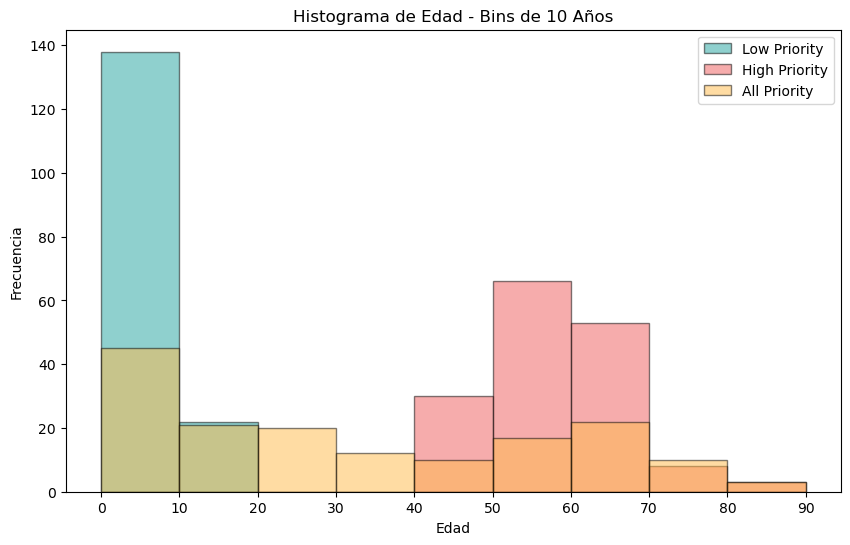

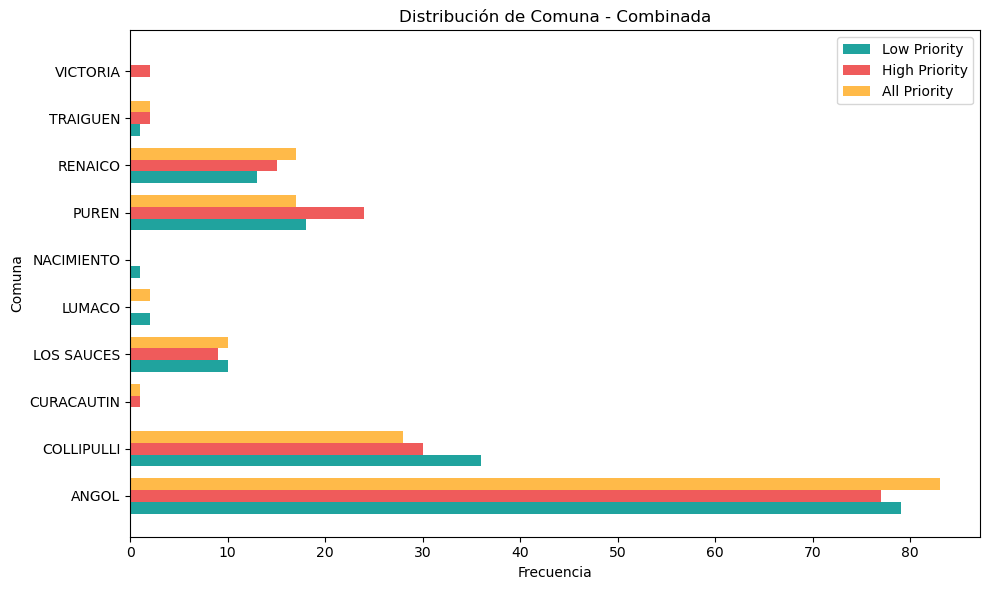

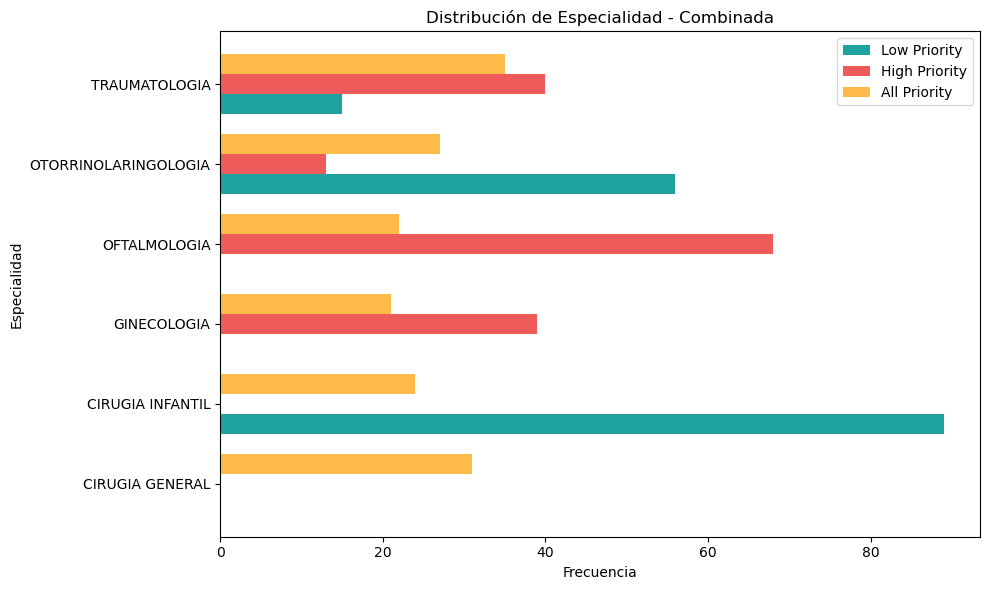

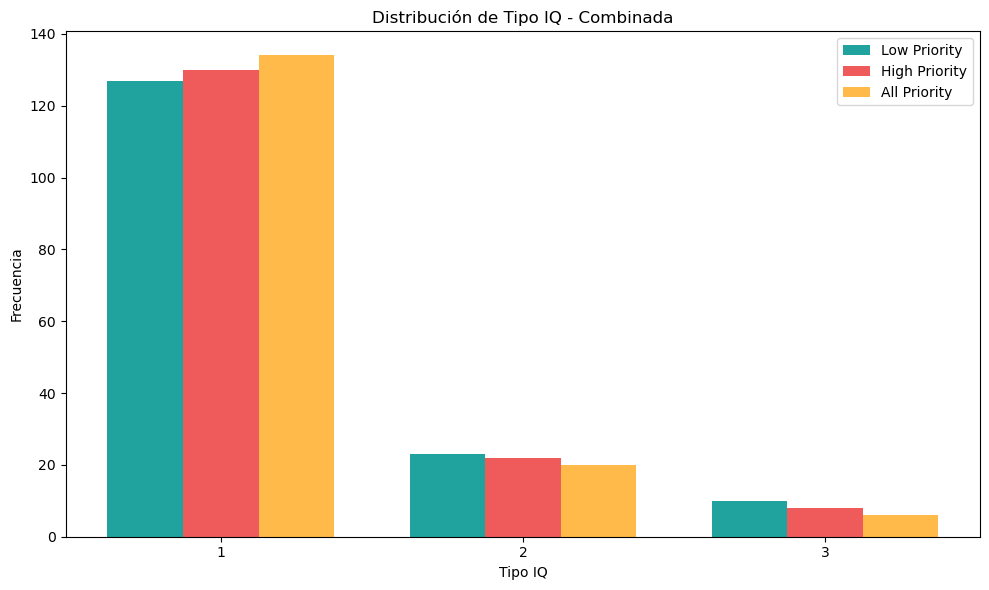

In [58]:
plt.figure(figsize=(10, 6))

# Determinar la edad mínima y máxima para crear bins de tamaño 10 años
min_age = min(low_priority_df["edad"].min(), high_priority_df["edad"].min(), all_priority_df["edad"].min())
max_age = max(low_priority_df["edad"].max(), high_priority_df["edad"].max(), all_priority_df["edad"].max())

# Crear bins de tamaño 10 años
bins = np.arange(min_age - (min_age % 10), max_age + (10 - max_age % 10) + 1, 10)

# Graficar histogramas con bins de tamaño 10 años
plt.hist(low_priority_df["edad"], bins=bins, alpha=0.5, label='Low Priority', color="#20a39e", edgecolor='black')
plt.hist(high_priority_df["edad"], bins=bins, alpha=0.5, label='High Priority', color="#ef5b5b", edgecolor='black')
plt.hist(all_priority_df["edad"], bins=bins, alpha=0.5, label='All Priority', color="#ffba49", edgecolor='black')

plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de Edad - Bins de 10 Años")
plt.xticks(bins)
plt.legend()
plt.savefig("Combined_Edad_Histograma.png")
plt.show()

# Gráficos de Comuna
plt.figure(figsize=(10, 6))
comunas_low = low_priority_df["comuna"].value_counts().sort_index()
comunas_high = high_priority_df["comuna"].value_counts().sort_index()
comunas_all = all_priority_df["comuna"].value_counts().sort_index()

# Unir todos los índices
comunas_union = comunas_low.index.union(comunas_high.index).union(comunas_all.index)

# Reindexar las series de datos
comunas_low = comunas_low.reindex(comunas_union, fill_value=0)
comunas_high = comunas_high.reindex(comunas_union, fill_value=0)
comunas_all = comunas_all.reindex(comunas_union, fill_value=0)

# Definir y basado en el índice unificado
y = np.arange(len(comunas_union))
height = 0.25

plt.barh(y - height, comunas_low, height=height, color="#20a39e", label='Low Priority')
plt.barh(y, comunas_high, height=height, color="#ef5b5b", label='High Priority')
plt.barh(y + height, comunas_all, height=height, color="#ffba49", label='All Priority')

plt.xlabel("Frecuencia")
plt.ylabel("Comuna")
plt.title("Distribución de Comuna - Combinada")
plt.yticks(y, comunas_union)
plt.legend()
plt.tight_layout()
plt.savefig("Combined_Comuna.png")
plt.show()

# Gráficos de Especialidad
plt.figure(figsize=(10, 6))
especialidad_low = low_priority_df["especialidad"].value_counts().sort_index()
especialidad_high = high_priority_df["especialidad"].value_counts().sort_index()
especialidad_all = all_priority_df["especialidad"].value_counts().sort_index()

# Unir todos los índices
especialidad_union = especialidad_low.index.union(especialidad_high.index).union(especialidad_all.index)

# Reindexar las series de datos
especialidad_low = especialidad_low.reindex(especialidad_union, fill_value=0)
especialidad_high = especialidad_high.reindex(especialidad_union, fill_value=0)
especialidad_all = especialidad_all.reindex(especialidad_union, fill_value=0)

# Definir y basado en el índice unificado
y = np.arange(len(especialidad_union))
height = 0.25

plt.barh(y - height, especialidad_low, height=height, color="#20a39e", label='Low Priority')
plt.barh(y, especialidad_high, height=height, color="#ef5b5b", label='High Priority')
plt.barh(y + height, especialidad_all, height=height, color="#ffba49", label='All Priority')

plt.xlabel("Frecuencia")
plt.ylabel("Especialidad")
plt.title("Distribución de Especialidad - Combinada")
plt.yticks(y, especialidad_union)
plt.legend()
plt.tight_layout()
plt.savefig("Combined_Especialidad.png")
plt.show()

# Gráficos de Tipo IQ
plt.figure(figsize=(10, 6))
tipo_low = low_priority_df["tipo"].value_counts().sort_index()
tipo_high = high_priority_df["tipo"].value_counts().sort_index()
tipo_all = all_priority_df["tipo"].value_counts().sort_index()

# Unir todos los índices
tipo_union = tipo_low.index.union(tipo_high.index).union(tipo_all.index)

# Reindexar las series de datos
tipo_low = tipo_low.reindex(tipo_union, fill_value=0)
tipo_high = tipo_high.reindex(tipo_union, fill_value=0)
tipo_all = tipo_all.reindex(tipo_union, fill_value=0)

# Definir x basado en el índice unificado
x = np.arange(len(tipo_union))
width = 0.25

plt.bar(x - width, tipo_low, width=width, color="#20a39e", label='Low Priority')
plt.bar(x, tipo_high, width=width, color="#ef5b5b", label='High Priority')
plt.bar(x + width, tipo_all, width=width, color="#ffba49", label='All Priority')

plt.xlabel("Tipo IQ")
plt.ylabel("Frecuencia")
plt.title("Distribución de Tipo IQ - Combinada")
plt.xticks(x, tipo_union)
plt.legend()
plt.tight_layout()
plt.savefig("Combined_Tipo.png")
plt.show()

In [36]:
AUX = pd.read_excel("./Input/PATIENTS.xls")
AUX.head()

,Nº I.C.,FECHA RECEPCION,R.U.T.,NOMBRE DEL PACIENTE,SEXO,EDAD (AÑOS),TELEFONO,CELULAR,DIRECCION,COMUNA,"DESCRIPCION DE, DIAGNOSTICO",ESTABLECIMIENTO DE ORIGEN,ESTABLECIMIENTO DESTINO,POLICLINICO DE DESTINO,ESTADO,AUGE,T.E. FECHA RECEPCION,NSP,NSA,MOTIVO_IC,RUT_PROFESIONAL,NOMBRE_PROFESIONAL,ESPECIALIDAD,TIPO_IQ,PRESTACION,PRAIS,RNLE,N PAC,N PROF,N ESPEC
0,238666,1979,21688412-4,ELIZABETH ROMANEE CASTILLO SANCHEZ,FEMENINO,14,81315113,65644497,JOSE BUNSTER 1947 1947,ANGOL,COLELITIASIS / COLECISTECTOMIA LAPAROSCOPICA,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,345,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,7108401,IVAN SEPULVEDA NUÑEZ,CIRUGIA GENERAL,2,18-02-081,N,N,0,12.0,0
1,267723,1965,21450864-8,BRIAN ALEXANDER POBLETE VARELA,MASCULINO,15,34817400,56823861,LAS ENCINAS 49 VILLA TIJERAL 49,ANGOL,POLIPO VESICULAR DE BACINETE / COLECISTECTOMIA...,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,59,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,10789485,ANGEL RODRIGO PARADA HENRIQUEZ,CIRUGIA GENERAL,1,18-02-081,N,N,1,0.0,0
2,255701,1964,20977380-5,NADIA MALDONADO MEDINA,FEMENINO,16,75429174,93135802,PALACIO DE VERSALLES 1760 VILLA FRANCIA 1760,COLLIPULLI,COLELITIASIS / COLECISTECTOMIA VL,H. ANGOL,H. ANGOL,COLECISTECTOMIA POR VIDEOLAPAROSCOPIA,ACEPTADA,NO,183,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,17345901,JAVIER VASQUEZ PEDRERO,CIRUGIA GENERAL,1,18-02-081,N,N,2,14.0,0
3,266606,1962,20977353-8,ROSA MARIA TERESA WILLSON SALDAÑA,FEMENINO,16,76669743,57830258,CARLOS CASANUEVA 403 403,COLLIPULLI,HERNIA INGUINAL IZQ / HERNIOPLASTIA,H. ANGOL,H. ANGOL,"HERNIA INGUINAL, CRURAL, UMBILICAL, DE LA LINE...",ACEPTADA,NO,70,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,26246886,JOSEMILY BRAVO SILVA,CIRUGIA GENERAL,1,18-02-003,N,N,3,15.0,0
4,271264,1961,21060611-4,CAMILA ANDREA ZAMBRANO DE LA HOZ,MASCULINO,16,54441068,33369356,MANZANARES S/N 0,RENAICO,ONICOCRIPTOSIS / ONICECTOMIA (CX MENOR),H. ANGOL,H. ANGOL,RESECCION O PLASTIA,ACEPTADA,NO,30,0,0,RESOLUCION QUIRURGICA TIENE CONFIRMADO DG Y EX...,26246886,JOSEMILY BRAVO SILVA,CIRUGIA GENERAL,1,14-02-029,N,N,4,15.0,0


# Unrelated

In [26]:
what = pd.read_csv("C:/Users/HP/downloads/cb_data_112124.csv")
what.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_35780\3101759270.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  what = pd.read_csv("C:/Users/HP/downloads/cb_data_112124.csv")


,Unnamed: 0.1,Unnamed: 0,Transaction Name,Transaction Name URL,Organization Name,Organization Name URL,Funding Type,Money Raised,Money Raised Currency,Money Raised (in USD),Announced Date,Funding Stage,Pre-Money Valuation,Pre-Money Valuation Currency,Pre-Money Valuation (in USD),Equity Only Funding,Organization Description,Organization Industries,Diversity Spotlight,Organization Location,Organization Website,Organization Revenue Range,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount (in USD),Number of Funding Rounds,Funding Status,Lead Investors,Investor Names,Number of Partner Investors,Number of Investors,CB Rank (Funding Round),Diversity Spotlight (US Headquarters Only),Country,Year,Full Description,IPO Status,IPO Date
0,0,0.0,Series A - JD Finance,https://www.crunchbase.com/funding_round/jd-fi...,JD Finance,https://www.crunchbase.com/organization/jd-fin...,Series A,6.650000e+09,CNY,1.010470e+09,2016-01-16,Early Stage Venture,4.000000e+10,CNY,6.078017e+09,Yes,JD Finance is a digital tech company providing...,"Artificial Intelligence (AI), Blockchain, Clou...",NaN,"Beijing, Beijing, China, Asia",https://jr.jddinnovation.com/,NaN,1.965000e+10,CNY,2.971067e+09,2,Early Stage Venture,Sequoia Capital China,"China Taiping Insurance, Harvest Investments, ...",NaN,4.0,"8,473",NaN,China,2016.0,JD Finance is a leading global digital technol...,NaN,NaN
1,1,1.0,Series B - Qeexo,https://www.crunchbase.com/funding_round/qeexo...,Qeexo,https://www.crunchbase.com/organization/qeexo,Series B,4.500000e+06,USD,4.500000e+06,2016-01-21,Early Stage Venture,NaN,NaN,NaN,Yes,Qeexo develops machine learning solutions for ...,"Consumer Electronics, Machine Learning, Mobile",Women Founded,"Mountain View, California, United States, Nort...",http://www.qeexo.com,$1M to $10M,7.400000e+06,USD,7.400000e+06,3,M&A,KTB Network,"DHVC, KTB Network, Sierra Ventures",NaN,3.0,"17,630",NaN,United States,2016.0,"Qeexo AutoML is a one-click, fully-automated p...",Private,NaN
2,2,2.0,Series A - iCarbonX,https://www.crunchbase.com/funding_round/icarb...,iCarbonX,https://www.crunchbase.com/organization/icarbonx,Series A,4.500000e+07,USD,4.500000e+07,2016-07-15,Early Stage Venture,1.155000e+09,USD,1.155000e+09,Yes,iCarbonX is a China-based artificial intellige...,"Artificial Intelligence (AI), Biotechnology, H...",NaN,"Shenzhen, Guangdong, China, Asia",https://www.icarbonx.com/,$10M to $50M,2.000000e+08,USD,2.000000e+08,2,Early Stage Venture,China Bridge Capital,"China Bridge Capital, ProCapital, Share Capital",NaN,3.0,"21,521",NaN,China,2016.0,iCarbonX aimed at building a ecosystem of digi...,NaN,NaN
3,3,3.0,Series B - MiningLamp,https://www.crunchbase.com/funding_round/minin...,MiningLamp,https://www.crunchbase.com/organization/mining...,Series B,3.000000e+07,USD,3.000000e+07,2016-08-10,Early Stage Venture,NaN,NaN,NaN,Yes,MiningLamp helps clients to build their own kn...,"Analytics, Artificial Intelligence (AI), Big D...",NaN,"Beijing, Beijing, China, Asia",https://www.mininglamp.com/,$50M to $100M,8.418247e+08,USD,8.418247e+08,6,Late Stage Venture,Sequoia Capital China,"Heaven-Sent Capital Management, Sequoia Capita...",NaN,5.0,"32,985",NaN,China,2016.0,MiningLamp (Chinese: 明略数据) is a fast-growing s...,NaN,NaN
4,4,4.0,Seed Round - Skymind,https://www.crunchbase.com/funding_round/skymi...,Skymind,https://www.crunchbase.com/organization/skymind,Seed,3.000000e+06,USD,3.000000e+06,2016-09-29,Seed,NaN,NaN,NaN,Yes,"Skymind created Deeplearning4j, the open-sourc...",Artificial Intelligence (AI),NaN,"San Francisco, California, United States, Nort...",https://skymind.ai,NaN,1.450000e+07,USD,1.450000e+07,3,Early Stage Venture,NaN,"GreatPoint Ventures, Hemi Ventures, Liquid 2 V...",NaN,7.0,"35,173",NaN,United States,2016.0,"Skymind created Deeplearning4j, the open-sourc...",Private,NaN


In [34]:
country_investment = what.groupby('Country')['Total Funding Amount (in USD)'].sum();
country_investment_millions = country_investment / 1e9;
ranked_investment_millions = country_investment_millions.sort_values(ascending=False);
ranked_investment_millions

Country
United States     1446.088738
China              465.394713
United Kingdom      72.322636
Canada              40.416316
Israel              38.718620
                     ...     
Zambia               0.000024
Iran                 0.000022
Madagascar           0.000017
Belize               0.000010
Senegal              0.000000
Name: Total Funding Amount (in USD), Length: 119, dtype: float64